### Лекция 1
## Хэширование

**Хэш-таблица** - функция, ставящая в соответствие набору данных число (например, номер телефона - 3 последних цифры)
1) Детерминируемость (например, приводим большое число к маленькому)
2) Ограниченность
3) Лавинообразность (в базе данных хранится не пароль, а хэш-функция)
4) Скорость вычисления (должна быть очень высокой)

- **md (md5)** - пример хэш-функции, быстро вычисляется и хорошая лавинообразность
- **sha**

### В *python* встроенная функция ***hash()***
**Полиномиальный хэш** - строчка ---> число

Есть строка $s = s_1s_2s_3...s_k$
$$h(s) = (\sum_{i=1}^k{f(s_i)}a)mod\:b$$
$$f(s) = ord(s_i) - ord('a') + 1$$

- $f(s) \neq 0$
- можно использовать схему Горнера
- $mod\:b$ даёт ограниченность


**Поиск вхождений подстроки g в строке s**
- $h = hash(s[i:i+p])$
- нужно посчитать $h = hash(s[i+1:i+p+1])$
  $$hash(s[i+1:i+p+1]) = (\sum_{j=i+1}^{i+p+1} f(s_j)a^{i+p+1-j})mod\:b = hash(s[i:i+p])*a + f(s[i+p+1]) - f(s[i])(a^pmod\:b)$$


### !!! dict() и set() в python работают как хэш-таблицы

In [1]:
def polhash(data, a, b):
    res = 0
    for x in data:
        res = (res * a + ord(x) - ord('a') + 1) % b
    return res

#pol('abc', 40, 10000000)

### Лекция 2

1) Типы данных
2) Списки/массивы (list, tuple)
3) Ассоциативный массив (dict, set) --- по ключу получается/меняется значение + добавляется хэш
4) Куча
5) Связные списки
6) Графы, деревья

### Куча 
- двоичное дерево - 2 потомка у каждого корня (на уровнях: 1 элемент -> 2 элемента -> 4 -> 8 -> ... )
- родитель < (или >) потомков (в вершине лежит либо самое маленькое значение - минимальная куча, либо самое большое значение - максимальная куча)
- заполнение сверху вниз и слева направо - в таком случае мы можем пронумеровать все элементы и хранить кучу в списке
- номера элементов:
-  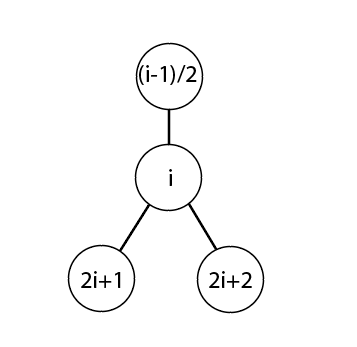

n элементов в списке -> nlog(n) действий на заполнение дерева и nlog(n) на вытаскивние

**Пирамидальная сортировка**

Список [0, -2, 16, 11, 37, 58, 1]

Куча 0 -> -2, 16 -> 11, 37, 58, 1

Кучу сортируем по возрастанию -> создаем максимальную кучу (на это нужно $ \sum_{k=1}^{log_2k} \frac{n}{2^k} (k-1) $ действий)

In [2]:
# РЕАЛИЗАЦИЯ КУЧИ ЧЕРЕЗ CLASS

# heapq - встроенный модуль для рабоыт с кучами
# heapq.heappush(a,e) где a - список

class Heap:
    def __init__(self):
        self.__h = []

    def push(self, el):
        self.__h.append(el)
        self.__shift_up(len(self.__h) - 1)

    def __shift_up(self, n):
        if n==0: return
        p = (n-1)//2
        if self.__h[p] > self.__h[n]:
            self.__h[p], self.__h[n] = self.__h[n], self.__h[p]
            self.__shift_up(p)

    def pop(self):
        res = self.__h[0]
        self.__h[0] = self.__h[-1]
        self.__h.pop()
        if len(self.__h):
            self.__shift_down(0)

        return res

    def __shift_down(self, i, maxN = None):
        maxN = len(self.__h) if maxN is None else maxN
        m = sel.__h[i]
        if 2*i + 1  < len(self.__h): m = min(m, self.__h[2*i + 1])
        if 2*i + 2  < len(self.__h): m = min(m, self.__h[2*i + 2])
        if self.__h[i] == m: return
        if self.__h[2*i + 1] == m:
            self.__h[i], self.__h[2*i + 1] = self.__h[2*i + 1], self.__h[i]
            self.__shift_down(2*i+1, maxN)
            return
        if self.__h[2*i + 2] == m:
            self.__h[i], self.__h[2*i + 2] = self.__h[2*i + 2], self.__h[i]
            self.__shift_down(2*i+2, maxN)

    @staticmethod
    def heapify(a):
        h = Heap()
        h.__h = a[:]
        for i in range((len(a)-1)//2, -1, -1):
            h.__shift_down(i)

        return h

    @staticmethod
    def sort(a):
        h = Heap()
        h.__h = a
        for i in range((len(a)-1)//2, -1, -1):
            h.__shift_down(i)

        for i in range(len(a)-1, 0, -1):
            h.__h[0], h.__h[i] = h.__h[i], h.__h[0]
            h.__shift_down(0, i)

### Связный список
---> data | next ---> data | next ---> ...

- можно добавлять элементы (в начало!):
- head ---> 10 ---> None **добавим элемент** head ---> 5 ---> 10 ---> None
- забирать (из начала)
- работает как ***стэк***
- \
- можно добавить tail и с помощью него добавлять в начало, забирать из конца например
- head, tail
- |.............|
- 10........5

***Односвязный список*** - элемент указывает на следующий за ним, хождение в одну сторону

***Двусвязный список*** - элемент указывает на следующий и предыдущий за ним, хождение в две стороны

***Кольцевой буфер*** - замкнутый цикл из элементов

In [8]:
class Node:
    
    def __init__(self, data, nxt=None):
        self.data = data
        self.next = nxt

    def insert(self, data):
        n = Node(data, self.next)
        self.next = n

    def remove(self):
        if self.next is None:
            return
        r = self.next.data
        self.next = self.next.next
        return r

class LinkedList:

    def __init__(self):
        self.head = None
        self.tail = None

    def add(self, data):
        n = Node(data, self.head)
        if self.head is None:
            self.head = self.tail = n
        else:
            self.head = n

    def append(self, data):
        n = Node(data, self.head)
        if self.head is None:
            self.head = self.tail = n
        else:
            self.tail = n
            
    def pop(self):
        if self.head is None:
            raise ValueError('pop from empty Linked List')
        res = self.head.data
        self.head = self.head.next
        if self.head is None:
            self.tail = None
        return res

    def is_empty(self):
        return self.head is None

if __name__ == "__main__":
    from random import randint
    l = LinkedList()
    for i in range(1000000):
        l.add(i * 17 % 1000007)

    x = l.head
    while x != None:
        if x.data % 2 == 0:
            x.insert(x.data - 1)
        x = x.next
        
    x = l.head
    while x != None:
        if x.data % 3 == 0:
            x.remove()
        x = x.next

Код реализует односвязный список (LinkedList). Рассмотрим каждый класс и метод по отдельности:


Класс Node (Узел):

* def __init__(self, data, nxt=None)::  Конструктор класса Node.  Создает новый узел списка.
    * self.data = data:  Записывает переданные данные (data) в атрибут data узла. Это значение, которое хранится в узле.
    * self.next = nxt:  Записывает ссылку на следующий узел (nxt) в атрибут next.  nxt по умолчанию None, что означает, что узел является последним в списке.

* def insert(self, data)::  Вставляет новый узел *перед* текущим узлом.
    * n = Node(data, self.next): Создается новый узел n с данными data.  Ссылка на следующий узел для n устанавливается равной текущей ссылке self.next (то есть, новый узел вставляется перед существующим).
    * self.next = n:  Ссылка next текущего узла обновляется, теперь она указывает на новый узел n.

* def remove(self):: Удаляет узел, следующий за текущим узлом.
    * if self.next is None:: Проверка на то, существует ли следующий узел. Если нет, функция ничего не делает и возвращается.
    * r = self.next.data:  Сохраняется значение данных из следующего узла.
    * self.next = self.next.next:  Ссылка next текущего узла обновляется, теперь она указывает на узел, следующий за удаленным узлом.
    * return r:  Возвращается удаленное значение.


Класс LinkedList (Односвязный список):

* def __init__(self):: Конструктор класса LinkedList.
    * self.head = None:  Инициализирует head (начало списка) как None.
    * self.tail = None:  Инициализирует tail (конец списка) как None.

* def add(self, data):: Добавляет новый узел в начало списка.
    * n = Node(data, self.head): Создается новый узел n с данными data.  Ссылка next нового узла устанавливается равной текущему head (то есть, новый узел становится первым).
    * if self.head is None:: Проверка на пустой список.
    * self.head = self.tail = n:  Если список пуст, новый узел становится и head, и tail.
    * else: self.head = n:  Если список не пуст, новый узел становится новым head.

* def append(self, data):: Добавляет новый узел в конец списка.  В этом методе есть ошибка: он всегда устанавливает новый узел в начало списка, независимо от того, пустой список или нет.  Правильная реализация  должна перебирать список до последнего узла.

* def pop(self):: Удаляет и возвращает первый узел списка.
    * if self.head is None:: Проверка на пустой список. Если список пуст, генерируется исключение ValueError.
    * res = self.head.data:  Сохраняется значение данных из первого узла.
    * self.head = self.head.next:  head обновляется, теперь он указывает на второй узел.
    * if self.head is None: self.tail = None:  Если после удаления списка остался пустым,  tail тоже устанавливается в None.
    * return res:  Возвращается удаленное значение.

* def is_empty(self)::  Проверяет, пуст ли список. Возвращает True, если head равен None, иначе False.

В целом: Код содержит ошибку в методе append.  add добавляет в начало, а append – некорректно (добавляет в начало).  Остальной код корректно реализует односвязный список, но метод append нуждается в исправлении для добавления в конец списка.  Для корректной работы append нужно пройти по всем узлам до конца списка и установить ссылку next последнего узла на новый узел.

## Двоичное сортировочное дерево
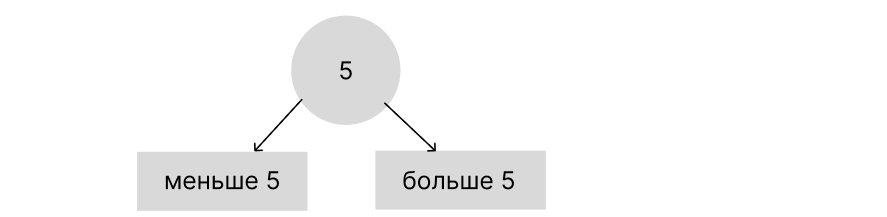

- обычно в сортировочном дереве элементы не повторяются
- ***Время работы*** *lg(n)* - в лучшем случае и *O(n)* - в худшем случае
- сбалансированное дерево: |n-m| <= 1, где n, m - высота деревьев, отходящих от верхнего элемента
- несбалансированное: иначе

In [7]:
class Node:
    def init(self, data):
        self.data = data
        self.left = self.right = None

    def add(self, data):
        if data > self.data:
            if self.right is None:
                self.right = Node(data)
            else:
                self.right.add(data)
        else:
            if self.left is None:
                self.left = Node(data)
            else:
                self.left.add(data)

    def str(self):
        return (
                (str(self.left) if self.left is not None else '')+
                f' {self.data}'+
                (str(self.right) if self.right is not None else '') )

class BinTree:
    def init(self):
        self.root = None

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self.root.add(data)

    def str(self):
        return str(self) if self.root is not None else ''
    

#from random import randint
#a = BinTree()
#for _ in range(10):
#    x = randint(10, 99)
#    print(x, end=' ')
#    a.add(x)

#print()
#print(a)

Давайте разберем код по шагам. Он состоит из двух классов: Node и BinTree.

Класс Node:

Этот класс представляет собой отдельный узел в бинарном дереве.

* __init__(self, data): Это конструктор класса. Он принимает данные (data), которые должны храниться в узле, и инициализирует атрибуты left и right как None.  left и right будут ссылаться на левого и правого потомков узла соответственно.

* add(self, data): Этот метод добавляет новый узел в поддерево, корнем которого является текущий узел.  Он выполняет рекурсивный обход дерева:
    - Если data больше, чем данные текущего узла (self.data), рекурсивно вызывается add для правого поддерева (self.right).
    - Если data меньше или равно, чем данные текущего узла, рекурсивно вызывается add для левого поддерева (self.left).
    - Если поддерево пустое (self.right или self.left равно None), новый узел создается и добавляется в соответствующее место.

* __str__(self):  Этот метод возвращает строковое представление узла и его поддеревьев.  Он рекурсивно строит строку, включающую данные текущего узла и строковые представления левого и правого поддеревьев.


Класс BinTree:

Этот класс представляет собой само бинарное дерево поиска.

* __init__(self):  Конструктор класса. Инициализирует атрибут root как None (дерево изначально пустое).

* add(self, data):  Добавляет данные data в дерево.  Если дерево пустое (self.root равно None), создает корневой узел.  Иначе, вызывает метод add у корневого узла (self.root.add(data)), который выполняет рекурсивную вставку.

* height(self):  Этот метод возвращает высоту дерева. Он вызывает вспомогательный рекурсивный метод _height_recursive.

* _height_recursive(self, node): Рекурсивно обходит дерево, чтобы найти высоту.
    - Базовый случай: если node равен None (достигнут конец ветки), возвращается 0.
    - Рекурсивный шаг: рекурсивно вызывается для левого и правого поддеревьев,  вычисляются их высоты (left_height и right_height).  Затем возвращается максимальная из высот плюс 1 (для учета текущего узла).

* __str__(self):  Этот метод возвращает строковое представление всего дерева, используя метод __str__ класса Node для корневого узла.


Главный блок (if __name__ == "__main__":)

Этот блок кода выполняется только тогда, когда скрипт запущен непосредственно (а не импортирован как модуль).

1. numbers = list(map(int, input().split())):  Считывает строку с числами, разделенными пробелами, преобразует каждое число в целое и создает список numbers.

2. tree = BinTree(): Создает объект класса BinTree (пустое дерево).

3. for number in numbers::  Перебирает каждое число в списке numbers.

4. tree.add(number): Добавляет каждое число в бинарное дерево поиска.

5. print(tree.height()): Выводит на экран высоту построенного дерева.


В целом, код демонстрирует простой способ построения и работы с не сбалансированным бинарным деревом поиска.  Важно отметить, что  вставка элементов без балансировки может привести к тому, что дерево станет сильно ассиметричным, что снизит эффективность поиска.

# Графы
Граф (V, E) - набор вершин и рёбер
- V - вершины - множество
- E: {(V1, V2): V1, V2 ∈ V}

Бывают **ориентированные** графы: тогда есть вергина-начало и вершина-конец => пары упорядоченные

**Соседние** вершины - те, которые соединяет какое-то ребро (аналогично про соседние ребра) // две вершины яв-ся соседними, если они **инцидентны** одному ребру

Вершина и ребро считаются **инцидентными**, если это ребро соединяет данную вершину с какой-либо другой вершиной. Инцидентное ребро: ребро, которое соединяет данную вершину с другой вершиной. Инцидентная вершина: вершина, которая является концом данного ребра

**Кратные** ребра - те, у которых набор вершин совпадает

**Петля** - ребро, которое инцидентно одной вершине

**Простой граф** - граф без петель и кратных ребер

*Кол-во ребер - мощность графа*

*Кол-во вершин - размер графа*

**Порядок** вершины графа - кол-во инцидентных ребер (ребер, выходящих из этой вершины)

1) Маршрут
2) Путь - с указанием начала и конца
3) Цепь
4) Цикл - цепь с совпадающими началом и концом

- Если существует эйлеров путь, то количество вершин с четной степенью должно быть 2

Две вершины наз-ся **связными**, если можно найти путь из одной в другую (в случае с ориентированными графами - сильная связность)

**Компонента связности** - все те вершины, которые связаны друг с другом

**Мост** - ребро, при удалении которого из графа увеличивается число компонент связности (аналогичная точка - **точка сочленения**)

**Взвешанный/невзвешанный граф** - приписываем ли мы тому или иному ребру вес

## Способы хранения графа
1) матрица смежности
   - 1 - если есть ребро; 0 - если нет; если кратные ребра, то 2, 3,....
   - симметрична для неориентированного графа
   - на диагоналях петли
  
**Планарный граф** - без самопересечений ребер

Непланарные: $К_5$ И $К_{3,3}$

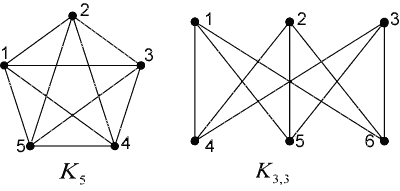

2) Для каждой вершины храним соседние (для каждой вершины степень - длина списка):
   - A [B, D]
   - B [A, C, F]
   - и т.д

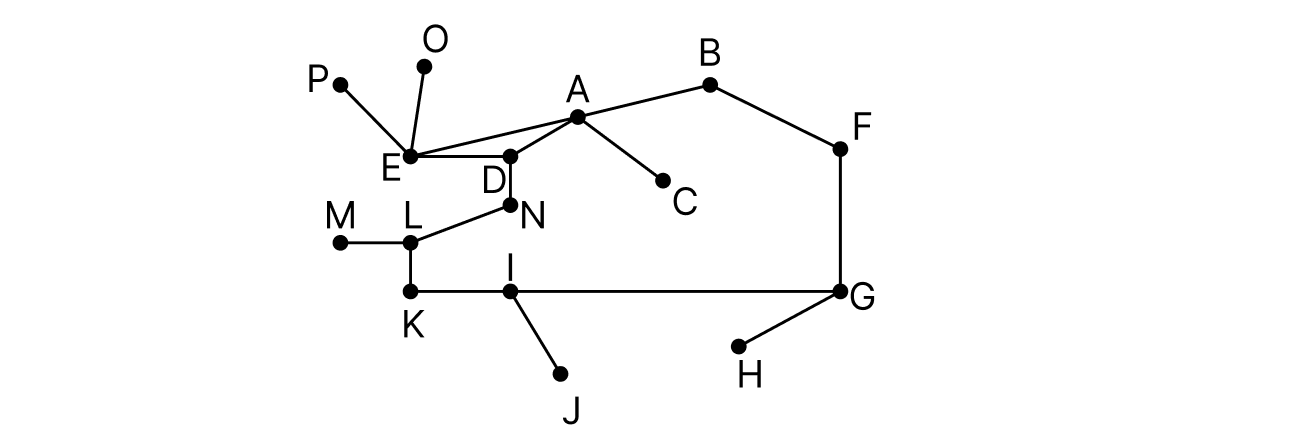

In [2]:
def read_matrix():
    N, M = map(int, input().split())
    G = [[0]*N for _ in range(N)]
    name = []
    for _ in range(M):
        v, u = input().split()
        if v not in name: name.append(v)
        if u not in name: name.append(u)
        v = name.index(v)
        u = name.index(u)
        G[u][v] = 1
        G[v][u] = 1
    return G, name

#if __name__ == "__main__":
#    G, name = read_matrix()
#    print(' ', *name)
#    for i in range(len(name)):
#        print(name[i], *G[i], sum(G[i]))     #sum(G[i]) - степень вершины

In [3]:
def read_matrix():
    N, M = map(int, input().split())
    G = [[0]*N for _ in range(N)]
    name = []
    for _ in range(M):
        v, u = input().split()
        if v not in name: name.append(v)
        if u not in name: name.append(u)
        v = name.index(v)
        u = name.index(u)
        G[u][v] = 1
        G[v][u] = 1
    return G, name

def read_list():
    N, M = map(int, input().split())
    G = [[]*N for _ in range(N)]
    name = []
    for _ in range(M):
        v, u = input().split()
        if v not in name: name.append(v)
        if u not in name: name.append(u)
        v = name.index(v)
        u = name.index(u)
        G[u].append(v)
        G[v].append(u)
    return G, name

#if __name__ == "__main__":
#    G, name = read_matrix()
#    print(' ', *name)
#    for i in range(len(name)):
#        print(name[i], *G[i], sum(G[i]))     #sum(G[i]) - степень вершины

#    G, name = read_list()
#    for i in range(len(name))):
#        print(name[i], ':', *map(lambda x:name[x], G[i]))         #lambda для вывода имён вместо чисел (для наглядности)

In [4]:
def read_graph(orient=True, weight=False):
    G = {}
    N, M = map(int, input().split())
    for _ in range(M):
        if not weight:
            u, v = input().split()
            if u not in G: G[u] = []
            if v not in G: G[v] = []
            G[u].append(v)
            if not orient: G[v].append(u)
        else:
            u, v, w = input().split()
            w = float(w)
            if u not in G: G[u] = {}
            if v not in G: G[v] = {}
            G[u][v] = w
            if not orient: G[v][u] = w

    return G

#....G = read_graph()
#    for v in G:
#        print(v, G[v])

### Компактный вид хранения графа:
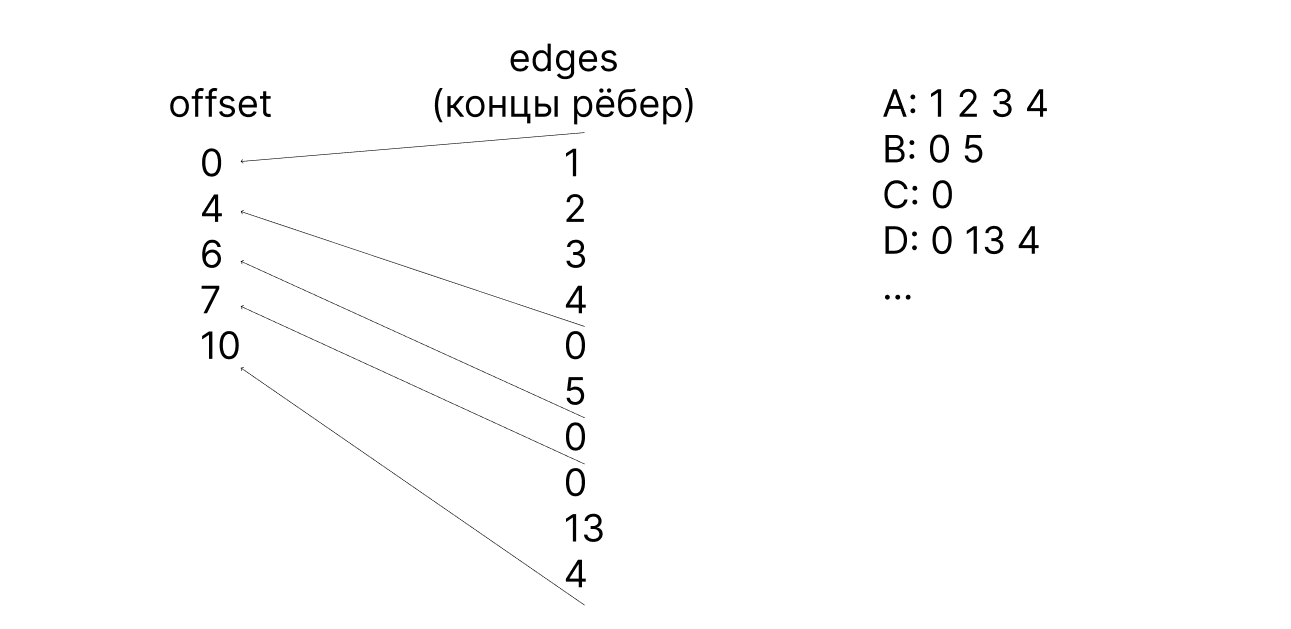

In [6]:
def compact(G:list[list[int]]):
    offset = [0]
    edges = []
    for lst in G:
        for ends in lst:
            edges.append(ends)
        offset.append(len(edges))
    return offset, edges

## Базовые алгоритмы обходов графов
- в глубину
- в ширину

#### в глубину (deep first search)
- граф -> остовное дерево
- позволяет построить путь

In [ ]:
G = read_graph()

def dfs(G, start, used=None):
    if used is None: used = set()
    used.add(start)
    print(f'call {start}.', end=' ')
    for neigh in G[start]:
        if neigh not in used:
            dfs(G, neigh, used)
    print(f'{start} finish.', end=' ')

dfs(G, 'A')

# для вывода компонент связности добавляем used
# N = 0 
# used = set()
# for v in G:
#     if v not in used:
#          dfs(G, v, used)
#          N += 1
# print(N)

#### в ширину (bfs)

In [ ]:
def BFS(start_node, adj_list, visited_set=None):
    if visited_set is None:
        visited_set = set()
    visited_set.add(start_node)
    queue = [start_node]
    while queue:
        curr_node = queve.pop(0)                               # если тут убрать 0 и оставить просто pop(), то bfs превратится в dfs
        for adj_node in adj_list[curr_node]:
            if adj_node not in visited_set:
                visited_set.add(adj_node)
                BFS(adj_node, adj_list, visited_set)
    return visited_set

In [ ]:
# найти расстояние до каждой точки

def BFS_dist(start_node, adj_list, distances=None):
    if distances is None:
        distances = [float("inf") for i in range(len(adj_list))]
    distances[start_node] = 0
    queue = [start_node]
    while queue:
        curr_node = queve.pop(0)
        for adj_node in adj_list[curr_node]:
            if distances[adj_node] == float("inf"):
                distances[adj_node] = distances[curr_node] + 1
                queue.append(adj_node)
    return distances

def trajectory(start_node, finish_node, adj_list):
    d = BFS_diststart_node, adj_list)
    res = [finish_node]
    curr_node = finish_node
    for i in range(d[finish_node]):
        for parent_node in rev_adj_list[curr_node]:
            if d[parent_node] + 1 == d[curr_node]:
                res.append(parent_node)
                curr_node = parent_node
                break
    return res[::-1]

In [ ]:
def read_graph():
    N, M = (int(x) for x in input().split())
    adj_list = [[] for i in range(N)]
    rev_adj_list = [[] for i in range(N)]
    for i in range(M):
        s, f = (int(x) for x in input().split())
        adj_list[s].append(f)
        rev_adj_list[f].append(s)
    return adj_list, rev_adj_list

In [ ]:
# шахматы

def move_knight(i, j):
    res = []
    steps = [2, -2, 1, -1]
    for step_1 in steps:
        for step_2 in steps:
            if abs(step_1) * abs(step_2) == 2:
                x = i + step_1
                y = j + step_2
                if 0 <=x < 8 and 0 <= y < 8:
                    res.append((x, y))
    return res

def chess_pos(i, j):
    column = '12345678'
    row = 'abcdefgh'
    return f"{row[i]}{column[j]}"

def chess_coords(s):
    x, y = s[0], s[1]
    column = '12345678'
    row = 'abcdefgh'
    return row.index(x), column.index(y)

def generate_pos():
    res = []
    for i in range(8):
        for j in range(8):
            res.append((i, j))

def chess_dist(start_node, distances=None):
    if distances is None:
        distances = {pos: float("inf") for pos in generate_pos()}
    distances[start_node] = 0
    queue = [start_node]
    while queue:
        curr_node = queve.pop(0)
        for move in move_knight[*curr_node]:
            if distances[move] == float("inf"):
                distances[move] = distances[curr_node] + 1
                queue.append(move)
    return distances

## Поиск кратчайшего пути

### Алгоритм Дейкстры
- https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%94%D0%B5%D0%B9%D0%BA%D1%81%D1%82%D1%80%D1%8B
- поиск кратчайшего пути
- в графе только положительные веса
- может быть и ориентированный, и неориентированный граф
- для начальной точки ставим расстояние 0, для остальных +inf
- далее идем по соседям и если расстояние меньше, то записываем его (создавая кучу)

In [ ]:
from random import randint

def read_graph():
    G = {}
    N, M = map(int, input().split())
    for _ in range(M):
        u, v = input().split()
        if u not in G:
            G[u] = {}
        if v not in G:
            G[v] = {}
        w = randint(1, 100)
        G[u][v] = w
        G[v][u] = w

    return G

def deykstra(G, start):
    h = []
    heapq.heappush(h, (0, start))
    dist = {v: float('+inf') for v in G}
    dist[start] = 0
    used = set()
    while len(h):
        w, v = heapq.heappop(h)
        if v in used:
            continue
        for neigh in G[v]:
            if w + G[v][neigh] < dist[neigh]:
                dist[neigh] = w + G[v][neigh]
                heapq.heappush(h, (dist[neigh], neigh))
        used.add(v)
    return dist

G = read_graph()
print(G)
print(deykstra(G, 'A'))

### Алгоритм Беллмана — Форда
https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D0%B5%D0%BB%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BE%D1%80%D0%B4%D0%B0

### Алгоритм Флойда — Уоршелла
https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A4%D0%BB%D0%BE%D0%B9%D0%B4%D0%B0_%E2%80%94_%D0%A3%D0%BE%D1%80%D1%88%D0%B5%D0%BB%D0%BB%D0%B0
- создается матрица смежности
- нет промежуточных вершин в начале

In [ ]:
# Алгоритм Флойда — Уоршелла

dist = {v: {u: +inf for u in G} for v in G}
for _ dist[u][v] = G[u][v]:
    for k in G:
      for i in G:
          for j in G:
              dist[i][j] = min(dist[i][j], (dist[i][k] + dist[k][j]))

## Постройка min остовного дерева
### Алгоритм Краскала
https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9A%D1%80%D0%B0%D1%81%D0%BA%D0%B0%D0%BB%D0%B0
- через кучу

### Алгоритм Прима
https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9F%D1%80%D0%B8%D0%BC%D0%B0
1. сортируем ребра по весу (время MlogM): добавляем по порядку в остовное дерево
2. проходим по списку и соединяем то, что не соединено(время M*f(M))
-> ***система непересекающихся множеств*** - для этого нужны 3 функции:
   - создание множеств make_set(e)
   - поиск множества, где лежит элемент find_set(e)
   - объединение union_set(A, B)

**Игра НИМ:**

кучки с разным количеством камней в них, игроки достают по очереди по одному камню из любой кучки

Выигрыш, если xor сумма всех камней не равна 0, проигрыш - если равна 0.

- (+) xor сумма 
- в питоне как a^b
- - - 
- 5 = 101 (в двоичной системе)
- 31 = 11111 (в двоичной системе)
- складываем их в столбик БЕЗ переноса
- ответ 26

**Сумма игр:**
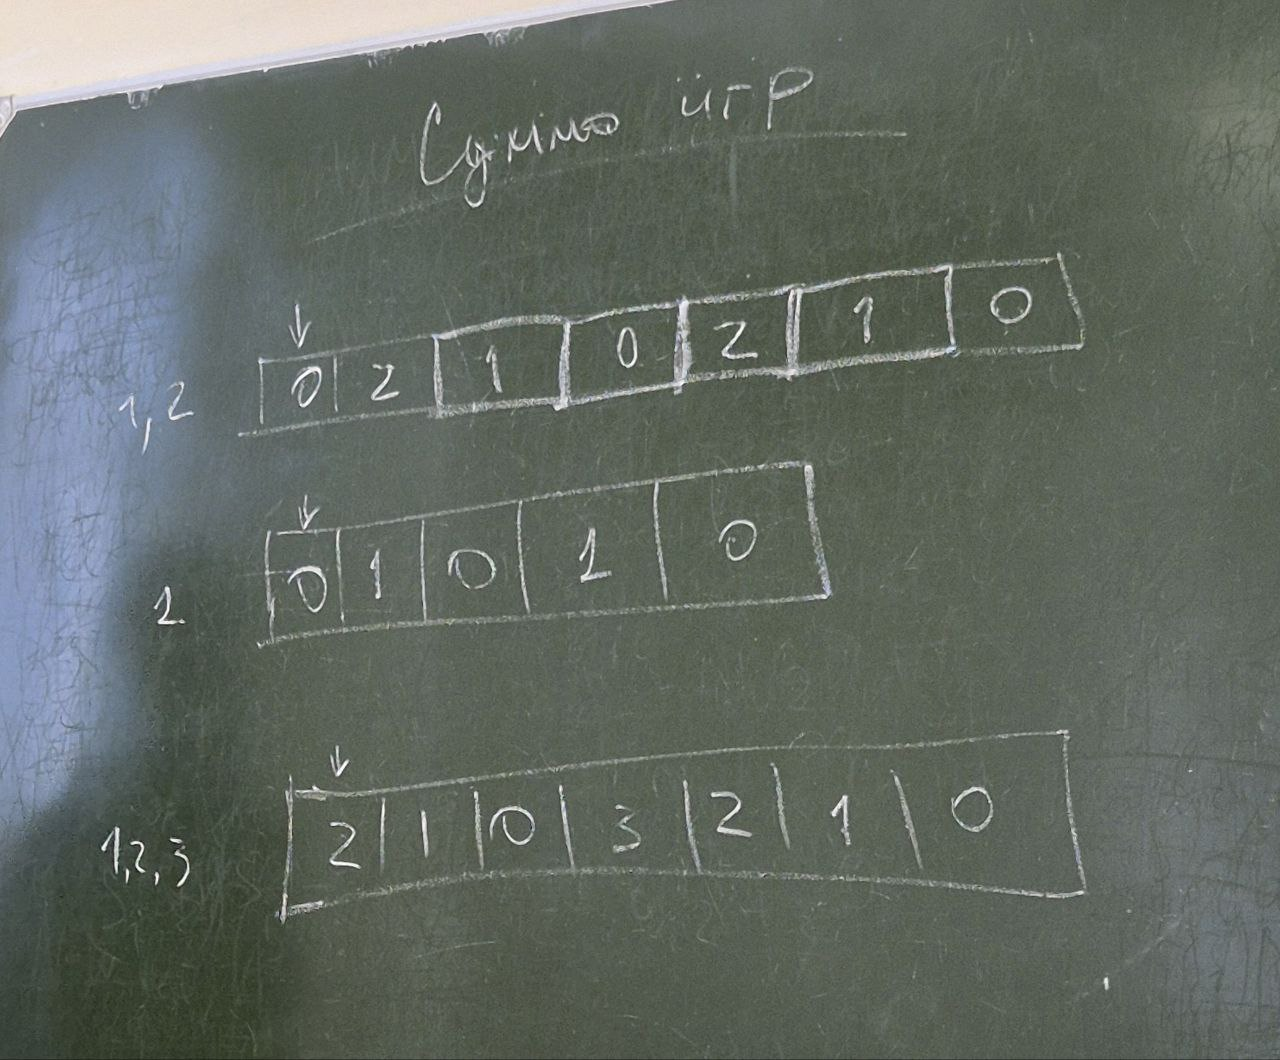
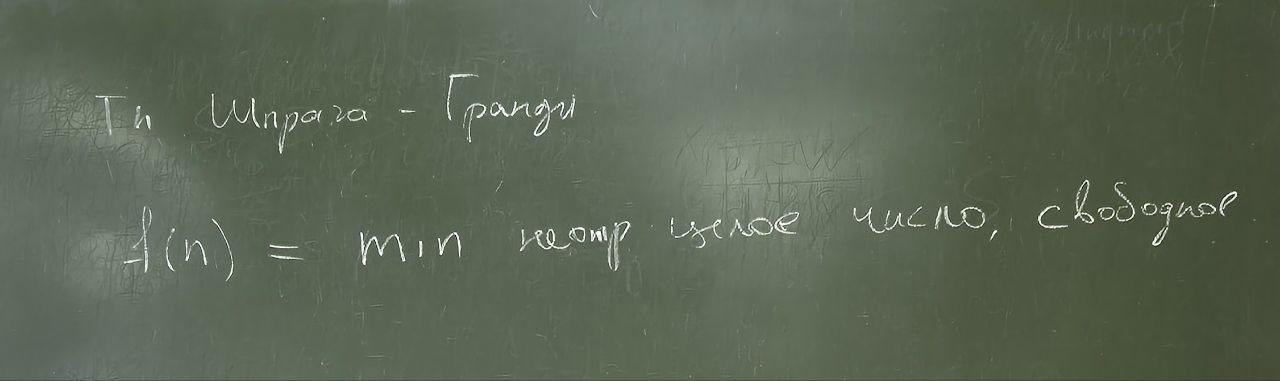

**На графе**
- запускаем обход в глубину на инверсном графе (все ребра развернуты в обратную сторону)
- 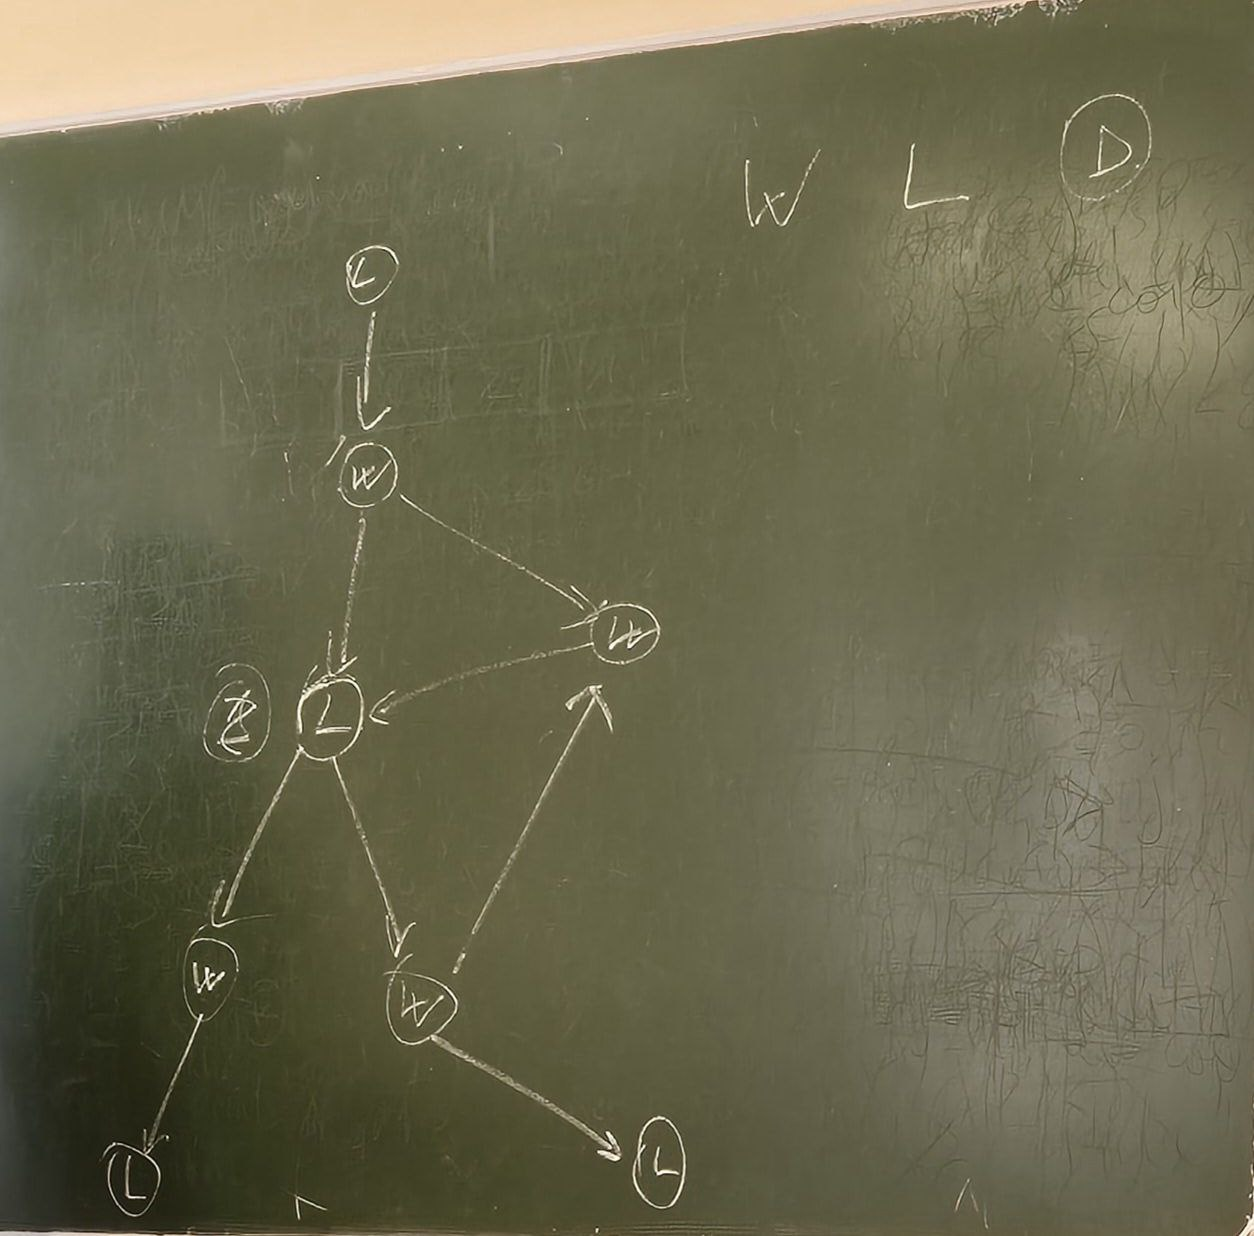
- 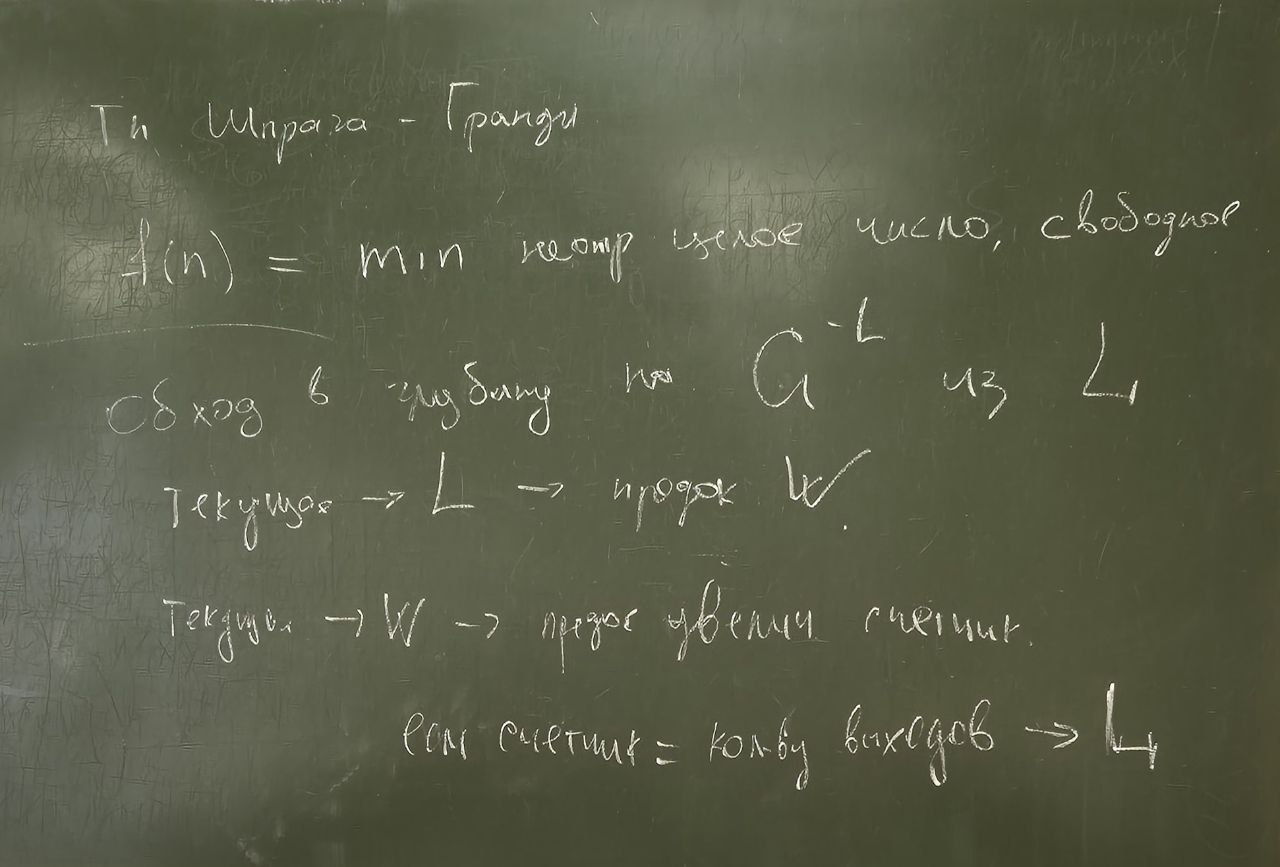

In [1]:
def grap(N, steps):
    

SyntaxError: incomplete input (2108604694.py, line 2)

### Генераторы
map, range, zip, enumirate

**Сопроцессы**

a = range(5)
1) получить итератор: tmp = iter(a)
2) получить следующие данные: b = next(tmp)

In [ ]:
# генератор range

def range(start, stop=None, step=1):
    if stop is None:
        stop = start
        start = 0
    if step == 0:
        raise ValueError
    if step > 0:
        i = start
        while i < stop:
            yield i
            i += step
    else:
        i = start
        while i > stop:
            yield i
            i += step

In [ ]:
# генератор enumerate

def enumerate(Iterable, start=0):
    index = start
    for item in Iterable:
        yield index, item
        index += 1

In [ ]:
# генератор zip

def zip(*iterables):
    iterators = [iter(it) for it in iterables]
    while True:
        items = []
        for it in iterators:
            try:
                items.append(next(it))
            except StopIteration:
                return
        yield tuple(items)

### Декораторы

In [ ]:
# декоратор swap , который меняет порядок первого и второго параметров

def swap(func):
    def wrapper(x, y, *args, **kwargs):
        return func(y, x, *args, **kwargs)
    return wrapper

# декоратор swap , который меняет (2*i)-ый с (2*i+1)-ым порядковым параметром, если это возможно. Именованые параметры остаються как были

def swap(func):
    def wrapper(*args, **kwargs):
        args = list(args)
        # Меняем местами пары (0,1), (2,3), (4,5) и т.д.
        for i in range(0, len(args) - 1, 2):
            args[i], args[i+1] = args[i+1], args[i]
        return func(*args, **kwargs)
    return wrapper

# декоратор debug(form) , который выводит всю информацию о работе функции. 
# form -- строка формата вывода отладочных данных. 
# form содержит: {args} - кортеж позиционных аргументов, {kwargs} -- словарь именованых параметров, {res} -- результат работы функции

def debug(form):
    def decorator(func):
        def wrapper(*args, **kwargs):
            res = func(*args, **kwargs)
            print(form.format(args=args, kwargs=kwargs, res=res))
            return res
        return wrapper
    return decorator